In [381]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import StandardScaler
#from sklearn.svm import SVR
#from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
#from sklearn.tree import DecisionTreeRegressor
# from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error,r2_score

In [382]:
boston = load_boston()
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [383]:
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [384]:
boston_df['PRICE']=boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [385]:
boston_df.shape

(506, 14)

In [386]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [387]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


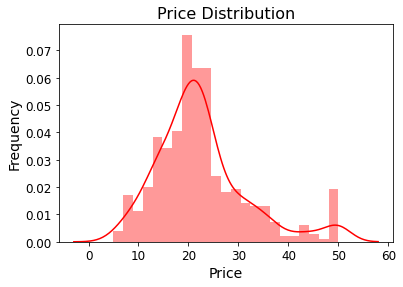

In [388]:
# 3. Distribution plot

sns.distplot(boston_df['PRICE'], color = 'r')
plt.title('Price Distribution', fontsize = 16)
plt.xlabel('Price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('distplot.png')
plt.show()

Text(0.5, 1.0, 'House Price vs YearTax')

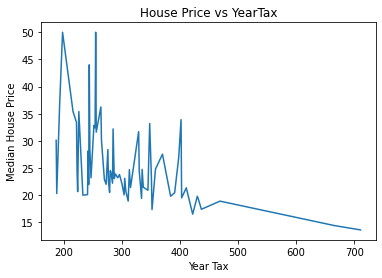

In [389]:
boston_df.groupby('TAX')['PRICE'].median().plot()
plt.xlabel('Year Tax')
plt.ylabel('Median House Price')
plt.title("House Price vs YearTax")

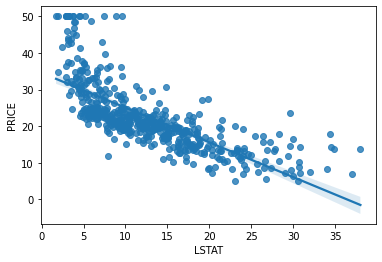

In [390]:
sns.regplot(y=boston_df['PRICE'], x=boston_df['LSTAT'])

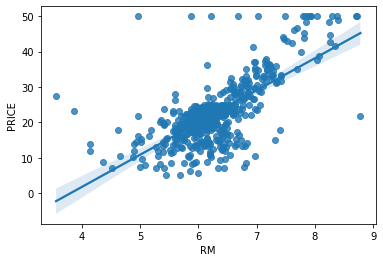

In [391]:
sns.regplot(y=boston_df['PRICE'], x=boston_df['RM'])

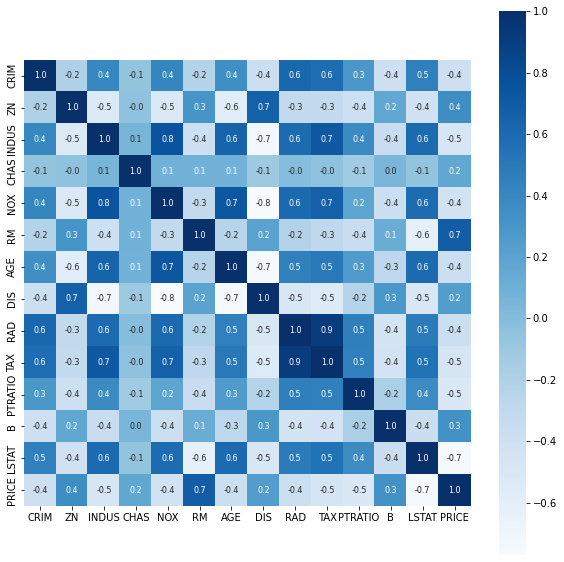

In [392]:
correlation = boston_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [512]:
X = boston_df.drop(['PRICE'], axis=1)
y = boston_df['PRICE']

In [513]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


In [514]:
sc_x=StandardScaler()
X=sc_x.fit(X_train)
X=sc_x.fit(X_test)

In [515]:
#modeling
house_Price_model=RandomForestRegressor()
house_Price_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [516]:
X_train_prediction = house_Price_model.predict(X_train)
X_train_prediction

array([24.901, 23.649,  7.475, 20.801, 13.516, 26.659, 27.823, 26.187,
       44.387, 23.767, 12.034, 33.815, 36.205, 36.01 , 19.317, 19.546,
       34.522, 47.117, 20.239, 14.284, 28.232, 19.804, 24.631, 20.819,
       23.51 , 20.257, 22.177, 27.838, 19.984, 22.752, 24.914,  9.744,
       24.548, 35.343, 14.171, 13.564, 39.994, 13.226, 21.122, 16.722,
       19.256, 24.125, 29.6  , 23.056, 23.704, 17.786, 28.228, 19.846,
       33.263, 14.75 , 20.453, 17.34 , 13.756, 30.073, 27.372, 25.47 ,
       23.827, 25.514, 43.708, 29.357, 26.195, 15.001, 20.544, 21.331,
       23.757, 11.891, 16.272, 24.342, 20.992, 21.76 , 14.977, 29.151,
       20.034, 23.551, 30.798, 19.536, 47.593, 20.732, 20.268, 23.087,
       17.444, 31.189, 12.076, 20.714, 20.398, 37.354, 20.   , 21.785,
       21.45 , 14.36 , 21.253, 17.068, 14.866, 19.363, 39.461, 19.211,
       45.994, 45.59 , 17.533, 16.727, 26.874, 16.137, 17.998, 28.054,
       25.491, 20.751, 19.592, 18.937, 22.038, 18.537, 30.387, 18.802,
      

In [517]:
# R squared error
score_1 =r2_score(y_train, X_train_prediction)

# Mean Absolute Error
score_2 =mean_absolute_error(y_train, X_train_prediction)

print("R squared error : {} %".format(score_1*100))
print('Mean Absolute Error : {} %'.format(score_2))

R squared error : 98.27104360761231 %
Mean Absolute Error : 0.7985618811881182 %


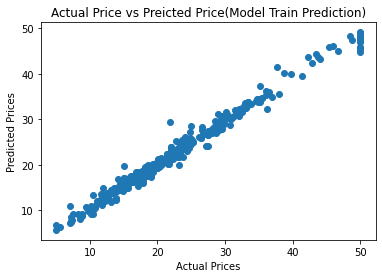

In [518]:
plt.scatter(y_train, X_train_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price(Model Train Prediction)")
plt.show()

In [519]:
# accuracy for prediction on test data
X_test_prediction = house_Price_model.predict(X_test)
X_test_prediction

array([30.363, 27.338, 20.155, 20.563, 20.151, 19.923, 28.316, 19.079,
       20.606, 23.708, 30.008, 31.175, 20.598, 20.133, 20.485, 26.635,
       11.847, 40.988, 24.158, 14.579, 19.919, 16.337, 24.118, 23.679,
       25.191,  9.256, 14.602, 19.397, 43.643, 12.43 , 26.529, 19.59 ,
       47.899, 15.924, 23.074, 20.842, 15.522, 33.111, 13.445, 19.532,
       24.708, 23.009, 25.583, 16.23 , 15.886, 11.677, 47.79 , 11.82 ,
       21.484, 18.516, 23.489, 21.457, 24.667, 20.501, 10.853, 23.81 ,
       11.22 , 23.639, 18.644, 43.259, 14.267, 26.833, 13.05 , 14.468,
       18.238, 33.738, 42.73 , 24.846, 21.575, 20.173, 23.856,  6.594,
       18.633, 21.008, 19.497, 20.537, 40.752, 24.44 , 27.6  , 32.642,
       17.616, 20.628, 34.255, 11.743, 24.626, 25.227, 14.474, 24.501,
       19.635, 17.275, 26.53 , 45.616, 16.237, 20.651, 14.822, 20.12 ,
       24.027, 23.938, 42.321, 20.671, 15.964, 15.278])

In [520]:
# R squared error
score_1 =r2_score(y_test, X_test_prediction)

# Mean Absolute Error
score_2 =mean_absolute_error(y_test, X_test_prediction)

print("R squared error : {} %".format(score_1*100))
print('Mean Absolute Error : {} %'.format(score_2))

R squared error : 91.01491236686833 %
Mean Absolute Error : 2.2834509803921588 %


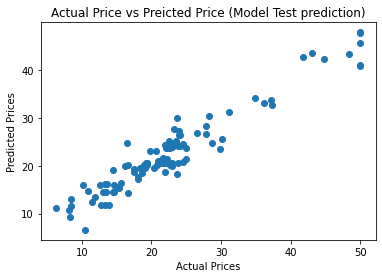

In [521]:
plt.scatter(y_test, X_test_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price (Model Test prediction)")
plt.show()